In [31]:
#!/usr/bin/python
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

### Require:
### 1) Only need -- IP_ID, Resource_ID, Timestamp(can be in binary for speed/space)
### 2) We may need a permanent ID table for IP, resource

def build_id_tbl(fname, col=0):
    ### build id table from given col in a CSV file
    data = Counter()
    with open(fname, mode='r') as infile:
        reader = csv.reader(infile, delimiter=',')
        next(reader)
        for rows in reader:
            data[rows[col]] += 1
    
    ### build table
    i = 0
    data_tbl = {}   ## use normal dict here, 'cause counter cannot start from 0
    for key in data.keys():
        data_tbl.update({key:i})
        i += 1

    return data_tbl
  
def build_hr_mat(fname, host, item): 
    """
    Return (hid, rid, # d/l)
    Build host ID table from D/L list -- need to remove duplicate IP
    """
    hrmat = Counter()
    with open(fname, mode='r') as infile:
        reader = csv.reader(infile, delimiter=',')
        next(reader)
        for rows in reader:
            hrmat[(host[rows[0]], item[rows[2]])] +=1    ## hid, rid, # d/l

    return (hrmat) 

def load_hr_mat(fname): 
    """
    Load "Host-Resource-#DL table to build the sparse matrix"
    """
    #data = np.genfromtxt(fname, delimiter=",")
    data = np.loadtxt(open(fname, "r"), delimiter=",", skiprows=0, dtype=int)
    return data



F_HR = "host_time_dataset_2020-03-24.csv"   # host,time,item
MAT_FILE = 'hr_mat.dat'
  
    
#### Main program    
host_tbl = build_id_tbl(F_HR, 0)
item_tbl = build_id_tbl(F_HR, 2)
hr_mat   = build_hr_mat(F_HR, host_tbl, item_tbl) 

# written in sparse matrix
I = [i[0] for i in hr_mat.keys()]
J = [i[1] for i in hr_mat.keys()]
D = [i    for i in hr_mat.values()]

with open(MAT_FILE, 'w') as f:
    for i in range(len(I)):
        f.write("%d,%d,%d\n" % (I[i],J[i],D[i] ) )       
print ("Host-Item table written done.")



Host-Item table written done.


In [32]:
### It is what the data look likes....

data = load_hr_mat(MAT_FILE)
print(data[0:10,:])

[[ 0  0  1]
 [ 1  1 14]
 [ 2  2  1]
 [ 3  3  1]
 [ 4  4  1]
 [ 5  5  1]
 [ 6  3  6]
 [ 7  6 15]
 [ 5  7  1]
 [ 8  8  1]]


Sparsity: 0.998337
=== top-10 resource ===
cifar-10 	 1003
sn_48-2019 	 62
sn_71-2019 	 52
sn_72-2019 	 43
sn_28-2019 	 42
sn_65-2019 	 41
sn_57-2019 	 36
sn_58-2019 	 36
sn_85-2019 	 36
sn_69-2019 	 35
=== top-10 host ===
151.80.39.47 	 89
5.196.87.151 	 85
5.45.207.63 	 21
157.55.39.12 	 14
114.119.160.32 	 13
114.119.162.214 	 13
114.119.165.118 	 10
114.119.163.208 	 10
114.119.163.45 	 9
114.119.161.142 	 9


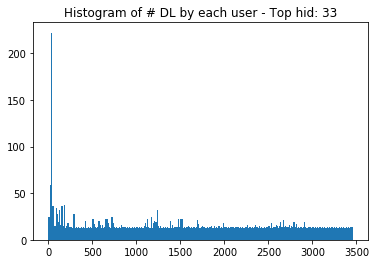

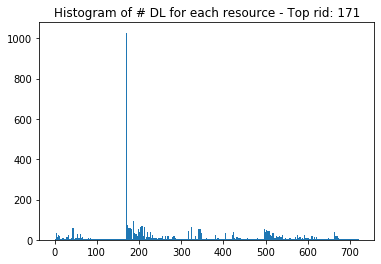

In [44]:
### The table and its inverse may be accessed from a databased.
inv_item_tbl = {v: k for k, v in item_tbl.items()}
inv_host_tbl = {v: k for k, v in host_tbl.items()}

def eda(data):
    """
    A glance of data of {host, resource, count}
    """
    print("Sparsity: %.6f" % (1 - len(data)/(np.max(data[:,0])*np.max(data[:,1]))     ) )
    plt.figure()
    plt.hist(data[:,0], bins=256)
    
    ### Top-10 resource
    top = Counter(data[:,1]).most_common(10)
    print("=== top-10 resource ===")
    for item in top:
        print(inv_item_tbl[item[0]], '\t', item[1])

    ### Top-10 host
    print("=== top-10 host ===")
    top = Counter(data[:,0]).most_common(10)
    for item in top:
        print(inv_host_tbl[item[0]], '\t', item[1])

    
    ###
    top = Counter(data[:,0]).most_common(1)
    plt.title("Histogram of # DL by each user - Top hid: %d" % top[0][0])
    plt.figure()
    plt.hist(data[:,1], bins=256)
    top = Counter(data[:,1]).most_common(1)
    plt.title("Histogram of # DL for each resource - Top rid: %d" % top[0][0])
    plt.show()
    
    
eda(data)
